In [3]:
# Inspiration
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

# Autoregression

In [ ]:
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]

In [ ]:
data[75:]

[76.36425216471689,
 77.81874331503784,
 78.27184372913196,
 79.43669399625615,
 80.40763626934736,
 81.25269396185837,
 82.76873666996454,
 83.9350664268049,
 84.87024238649929,
 85.42573077401677,
 86.22265581804696,
 87.74440528379233,
 88.14282847377625,
 89.42963286492936,
 90.54602285428331,
 91.75278920187937,
 92.77524390256518,
 93.52183368035622,
 94.509629740539,
 95.8929854170045,
 96.93695346765112,
 97.2776802134194,
 98.61153401397026,
 99.55677956793636]

In [ ]:
len(data)

99

In [ ]:
# AR example
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.55234006]


# Moving Average

In [ ]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
help(ARIMA)

In [ ]:


# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[75.56474772]


# Autoregressive Moving Average (ARMA)

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.44912484]


# Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[0.45855316]


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.30718326]


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [ ]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]
# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
print(yhat)

[100.02421566]


# Vector Autoregression (VAR)

The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.


In [ ]:
import statsmodels.api as sm
mdata = sm.datasets.macrodata.load_pandas().data

In [ ]:
mdata.shape

(203, 14)

In [ ]:
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)


In [ ]:
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)


In [ ]:
mdata

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


In [ ]:
data = np.log(mdata).diff().dropna()
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate.

In [ ]:
model = VAR(data)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Apr, 2023
Time:                     13:12:24
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

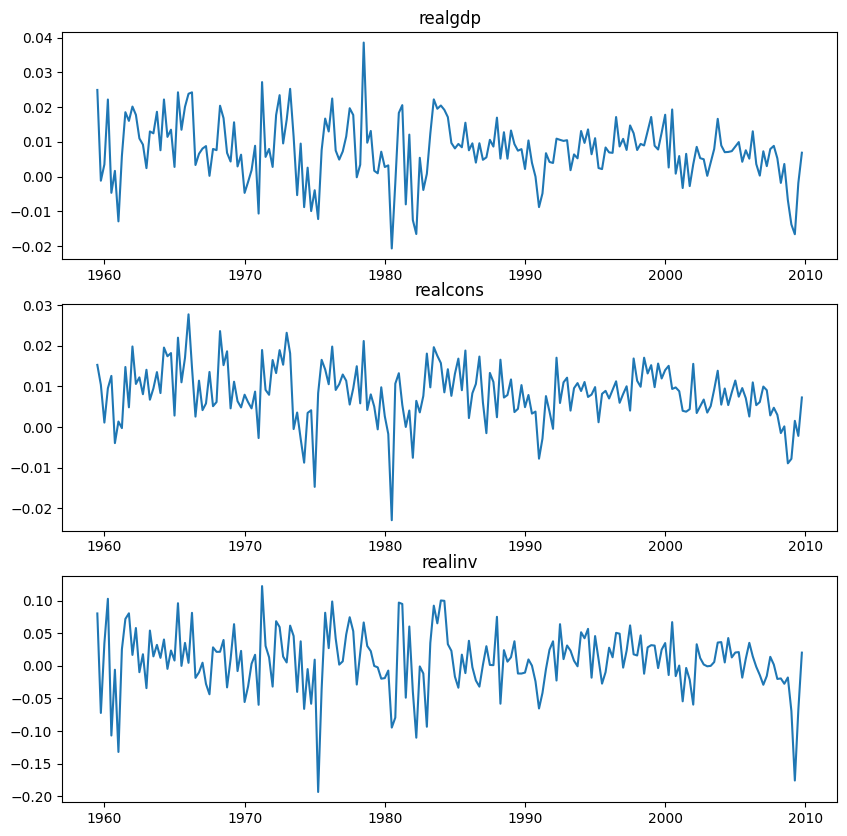

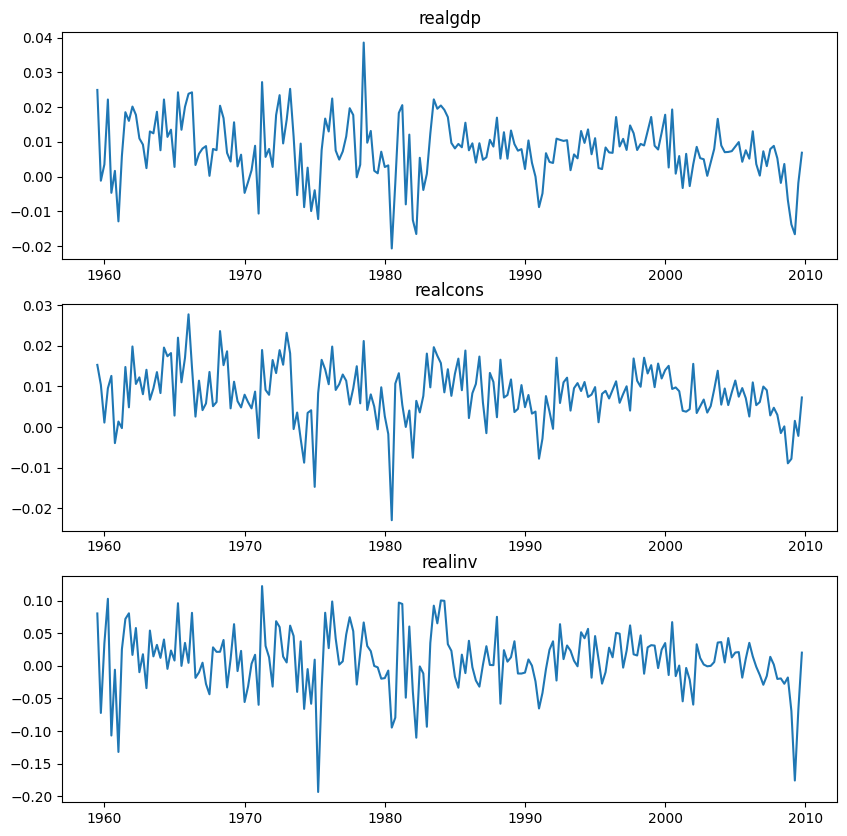

In [ ]:
results.plot()

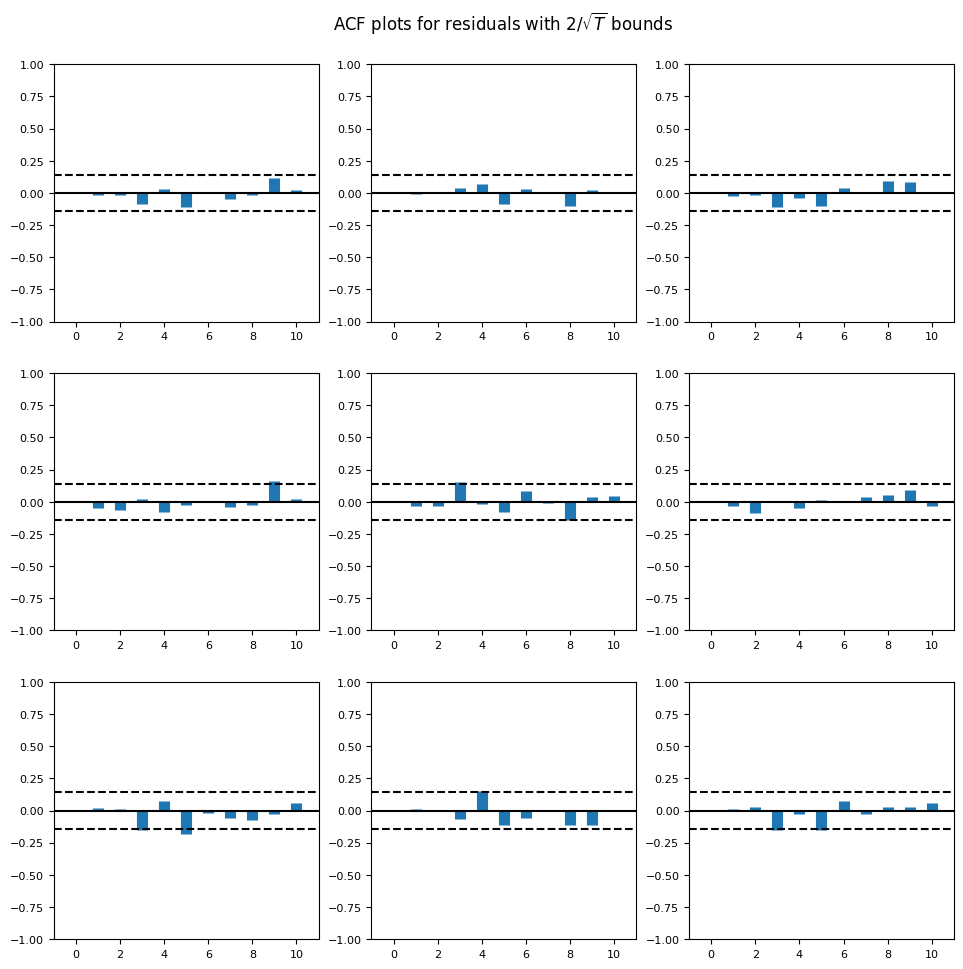

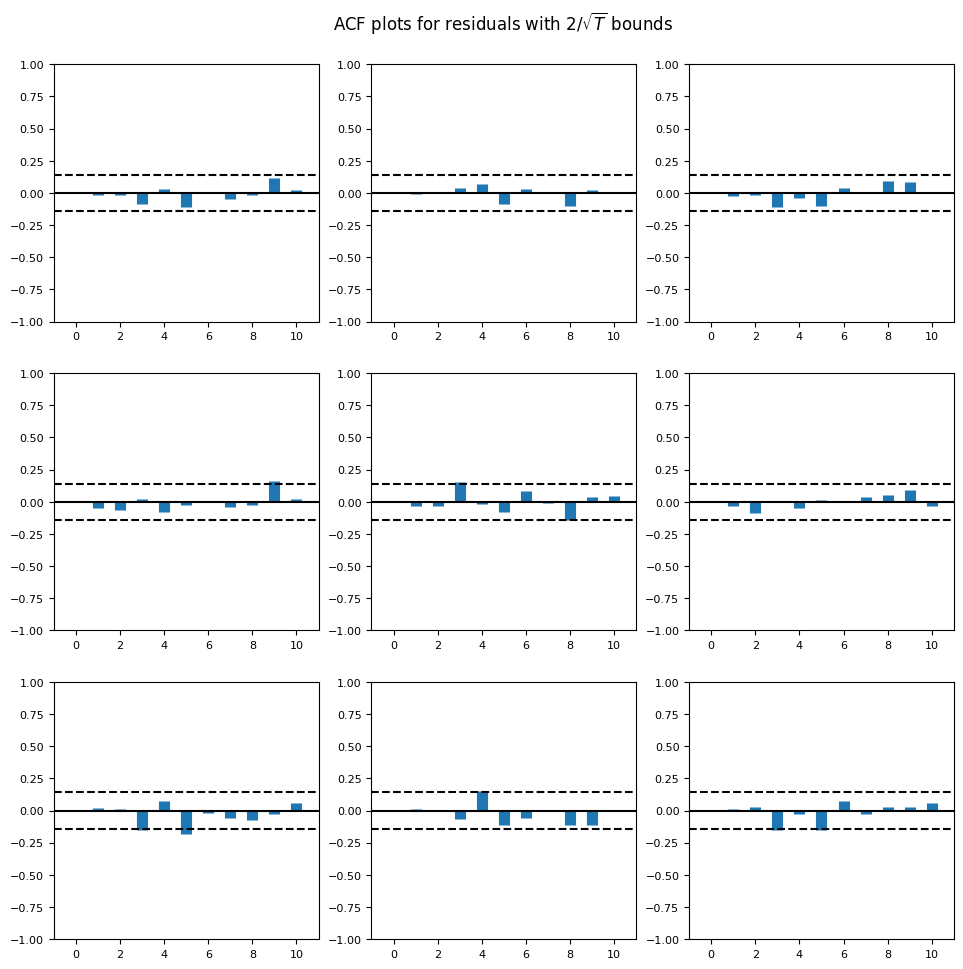

In [ ]:
results.plot_acorr()

In [ ]:
model.select_order(15)

In [ ]:
results = model.fit(maxlags=15, ic='aic')

In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Apr, 2023
Time:                     13:21:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

3

In [ ]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567]])

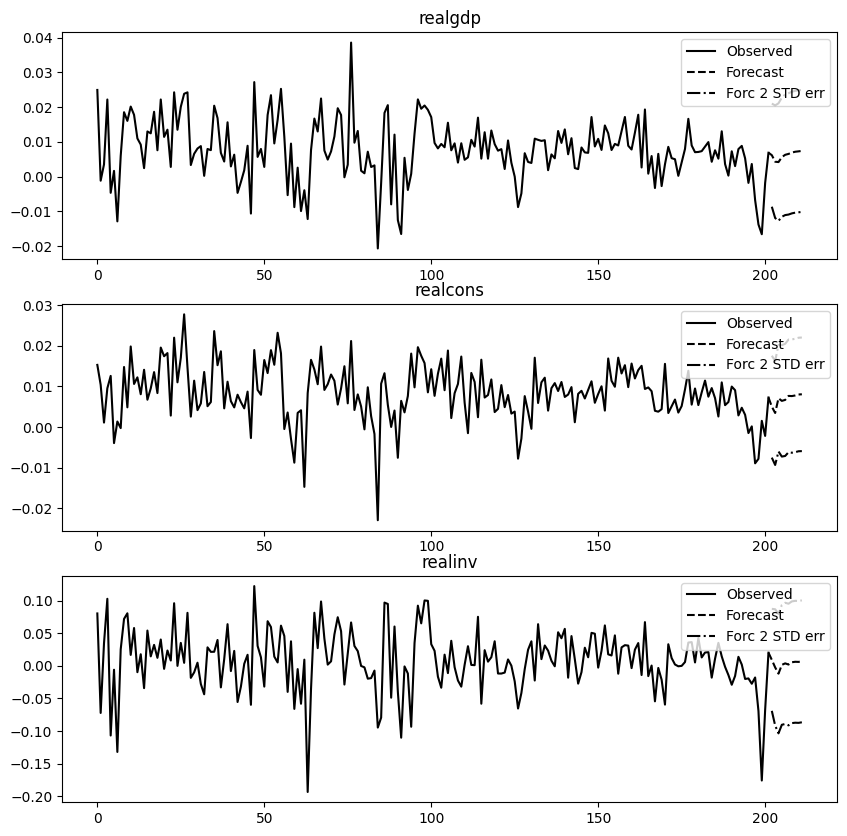

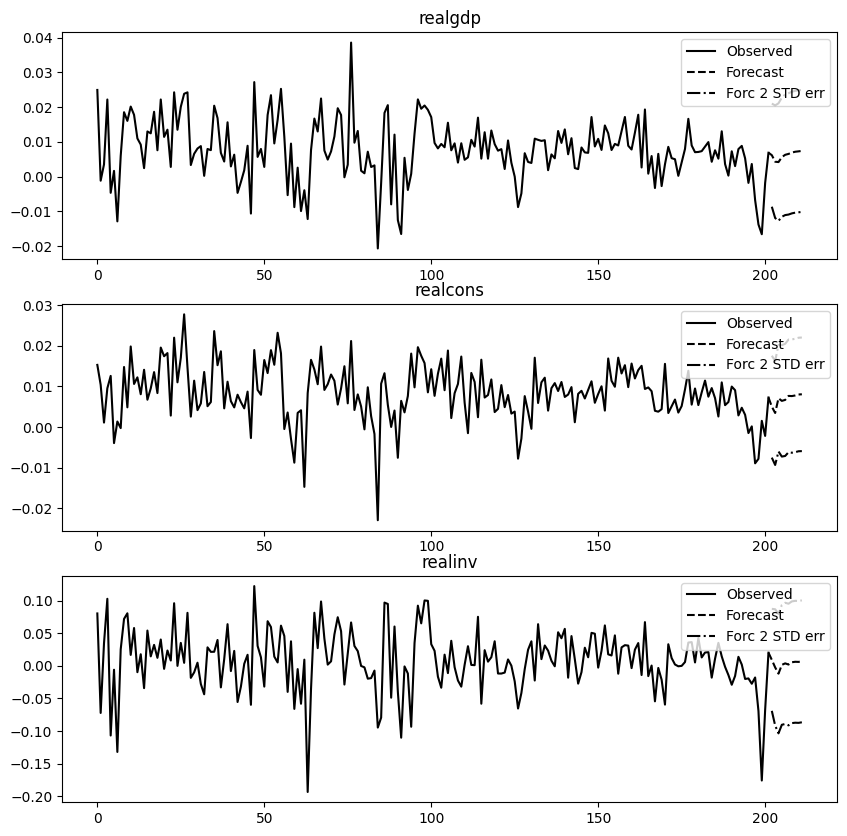

In [ ]:
results.plot_forecast(10)

# Vector Autoregression Moving-Average (VARMA)

The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

In [ ]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


             realgdp  realcons   realinv
2009-12-31  0.006688  0.007741  0.005404


# Simple Exponential Smoothing (SES)

models the next time step as an exponentially weighted linear function of observations at prior time steps.


In [1]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.27599526]


# Holt Winter’s Exponential Smoothing (HWES)

 also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

In [2]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.41147277]


# <font color=red> With Dummy Data </font>

In [ ]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency

# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


             realgdp  realcons   realinv
2009-12-31  0.006688  0.007741  0.005404


In [ ]:
# VAR example
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VAR(data)
model_fit = model.fit()


In [ ]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Apr, 2023
Time:                     13:29:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.29548
Nobs:                     99.0000    HQIC:                  -4.38913
Log likelihood:          -54.5381    FPE:                  0.0116468
AIC:                     -4.45276    Det(Omega_mle):       0.0109717
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.879840         0.098990            8.888           0.000
L1.y1         0.670128         0.142230            4.712           0.000
L1.y2         0.329243         0.142094            2.317           0.020

Results for equation 

In [ ]:
data1 = pd.DataFrame(data)
data1

,0,1
0,0.042934,0.764702
1,1.437991,2.054529
2,2.981038,3.032390
3,3.753049,4.124661
4,4.750974,4.979013
...,...,...
95,95.085293,96.043854
96,96.787321,97.087802
97,97.138613,97.643519
98,98.411500,98.977360


In [ ]:
lag_order = model_fit.k_ar
results.forecast(data1.values[-lag_order:], 3)